<a href="https://colab.research.google.com/github/gahz8212/python/blob/master/%ED%95%9C%EA%B5%AD%EC%95%84%ED%8C%8C%ED%8A%B8%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#stacking(쌓는 모델)
#기본모델-여러개의 모델을 쌓아서 모델마다 학습함.
#메타모델-기본모델들에서 학습한 결과를 다시 한번 판단하는 모델로 학습함.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [36]:
# 1) 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/csv/korea_apartment_sample.csv")


# 2) X(입력), y(타깃) 분리
X = df.drop("거래금액_만원", axis=1)
y = df["거래금액_만원"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# 4) 모델 학습 (랜덤포레스트)
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

model2 = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)
model2.fit(X_train, y_train)

model3 = LinearRegression()
model3.fit(X_train, y_train)


base_models=[
    ("lr",LinearRegression()),
    ("rf",RandomForestRegressor(n_estimators=300,random_state=42)),
    #("svr",make_pipeline(StandardScaler(),SVR(kernel='rbf',C=20))),
    ("svr",make_pipeline(StandardScaler(),SVR(kernel='linear',C=20))),
    ("dt",DecisionTreeRegressor(random_state=42))
    #("lgbm",LGBMRegressor(n_estimators=500,random_state=42,learning_rate=0.5)) #부스팅모델 learning_rate는 C값과 비슷

           ]
#meta_model=LGBMRegressor(
 #   n_estimators=300,
  #  learning_rate=0.5,
   # random_state=42
#)
meta_model=DecisionTreeRegressor(
    random_state=42
)
from sklearn.ensemble import StackingRegressor
stack_model=StackingRegressor(estimators=base_models,final_estimator=meta_model,n_jobs=-1)
stack_model.fit(X_train,y_train)


y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4=stack_model.predict(X_test)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 10
[LightGBM] [Info] Start training from score 65260.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [39]:
r2_1 = r2_score(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred2)
r2_3 = r2_score(y_test, y_pred3)
r2_4 = r2_score(y_test, y_pred4)
print("랜덤포레스트 r2: ", r2_1)
print("라이트GBM r2: ", r2_2)
print("linear r2: ", r2_3)
print("stacking r2: ", r2_4)



랜덤포레스트 r2:  0.8697170262583864
라이트GBM r2:  0.8961431606541058
linear r2:  0.9141322336831011
stacking r2:  0.8077248984045136


In [40]:
mse1 = mean_squared_error(y_test, y_pred)
rmse1 = np.sqrt(mse1)

mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)

mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)

mse4 = mean_squared_error(y_test, y_pred4)
rmse4 = np.sqrt(mse4)

print("랜덤포레스트 rmse: ", rmse1)
print("라이트GBM rmse: ", rmse2)
print("linear rmse: ", rmse3)
print("stacking rmse: ", rmse4)



랜덤포레스트 rmse:  6133.67716100873
라이트GBM rmse:  5476.39333270323
linear rmse:  4979.5737064526775
stacking rmse:  7451.412516429352


In [41]:
price1 = model.predict([[1, 2025, 11, 87.366605, 10, 15, 500, 1, 2, 3]])
price2 = model2.predict([[1, 2025, 11, 87.366605, 10, 15, 500, 1, 2, 3]])
price3 = model3.predict([[1, 2025, 11, 87.366605, 10, 15, 500, 1, 2, 3]])
price4 = stack_model.predict([[1, 2025, 11, 87.366605, 10, 15, 500, 1, 2, 3]])
price1, price2, price3, price4

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-pa

(array([60896.81666667]),
 array([60731.6341193]),
 array([59517.49267737]),
 array([55976.]))

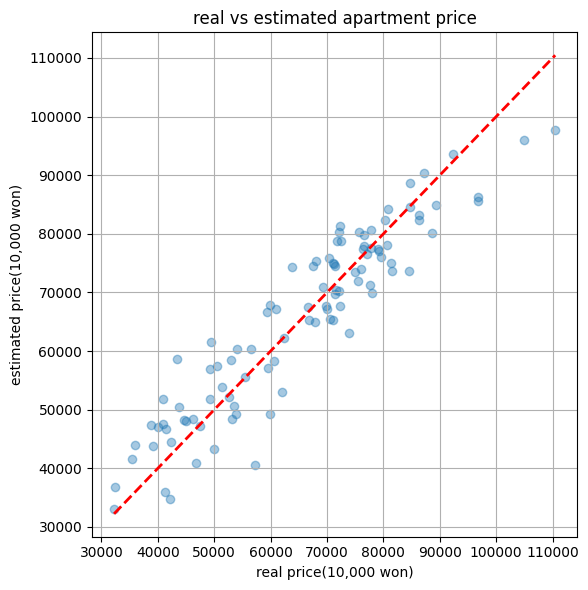

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

# 산점도: x축 실제, y축 예측
plt.scatter(y_test, y_pred, alpha=0.4)

# y = x 기준선 (완벽 예측선)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.xlabel("real price(10,000 won)")
plt.ylabel("estimated price(10,000 won)")
plt.title("real vs estimated apartment price")
plt.grid(True)
plt.tight_layout()
plt.show()

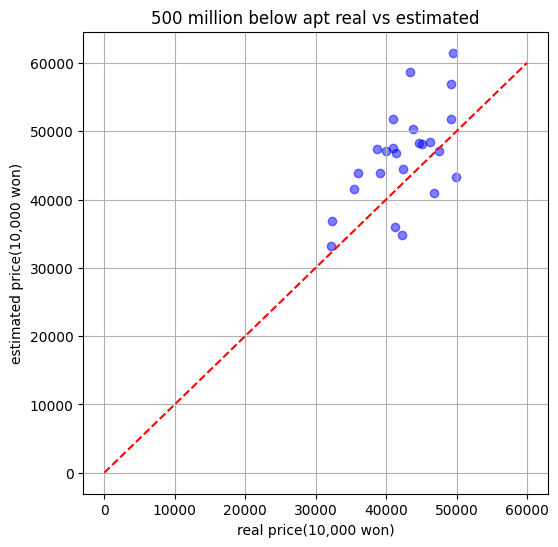

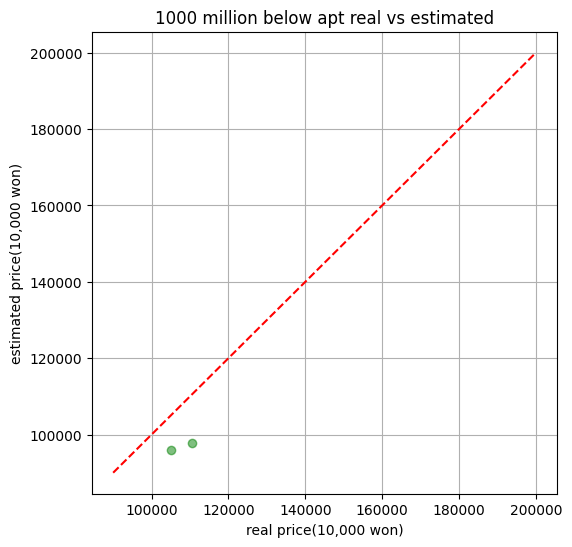

In [43]:
# 5억 이하(<=50,000)
mask_low = y_test <= 50000

plt.figure(figsize=(6,6))
plt.scatter(y_test[mask_low], y_pred[mask_low], alpha=0.5, color='blue')
plt.plot([0, 60000], [0, 60000], 'r--')
plt.title("500 million below apt real vs estimated")
plt.xlabel("real price(10,000 won)")
plt.ylabel("estimated price(10,000 won)")
plt.grid(True)
plt.show()

# 10억 이상(>=100,000)
mask_high = y_test >= 100000

plt.figure(figsize=(6,6))
plt.scatter(y_test[mask_high], y_pred[mask_high], alpha=0.5, color='green')
plt.plot([90000, 200000], [90000, 200000], 'r--')
plt.title("1000 million below apt real vs estimated")
plt.xlabel("real price(10,000 won)")
plt.ylabel("estimated price(10,000 won)")
plt.grid(True)
plt.show()

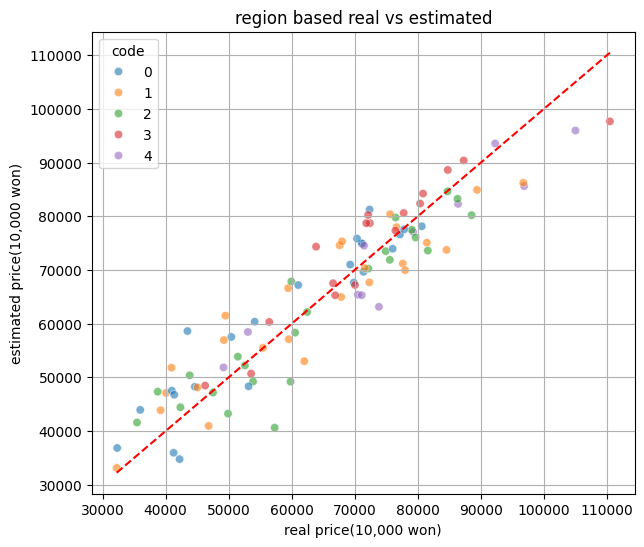

In [44]:
import seaborn as sns

# df_test : X_test index 기준으로 원본 데이터 위치 맞추기
df_test = df.loc[X_test.index]
df_test["code"] = df_test["지역코드"]
# (1) 지역 기반 색상
plt.figure(figsize=(7,6))
sns.scatterplot(
    x=y_test,
    y=y_pred,
    hue=df_test["code"],
    palette="tab10",
    alpha=0.6
)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.title("region based real vs estimated")
plt.xlabel("real price(10,000 won)")
plt.ylabel("estimated price(10,000 won)")
plt.grid(True)
plt.show()
#지역이 집값에 큰 영향을 주지 않는다고 판단된다.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


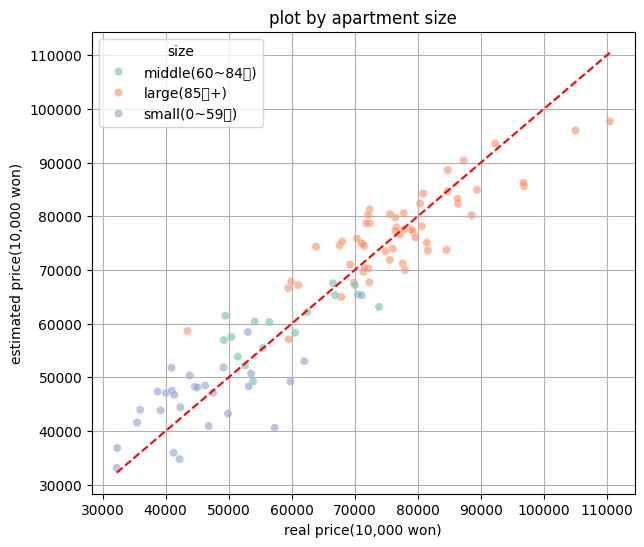

In [45]:
# (2) 평형대 만들기
def area_group(x):
    if x < 60:
        return "small(0~59㎡)"
    elif x <= 84:
        return "middle(60~84㎡)"
    else:
        return "large(85㎡+)"

df_test["size"] = df_test["전용면적"].apply(area_group) # 전용면적 리스트에 모두 적용되므로 브로드캐스팅 되었다고 한다.

# 평형대별 산점도
plt.figure(figsize=(7,6))
sns.scatterplot(
    x=y_test,
    y=y_pred,
    hue=df_test["size"],
    palette="Set2",
    alpha=0.6
)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.title("plot by apartment size")
plt.xlabel("real price(10,000 won)")
plt.ylabel("estimated price(10,000 won)")
plt.grid(True)
plt.show()
#평수가 집값에 영향을 끼친다.

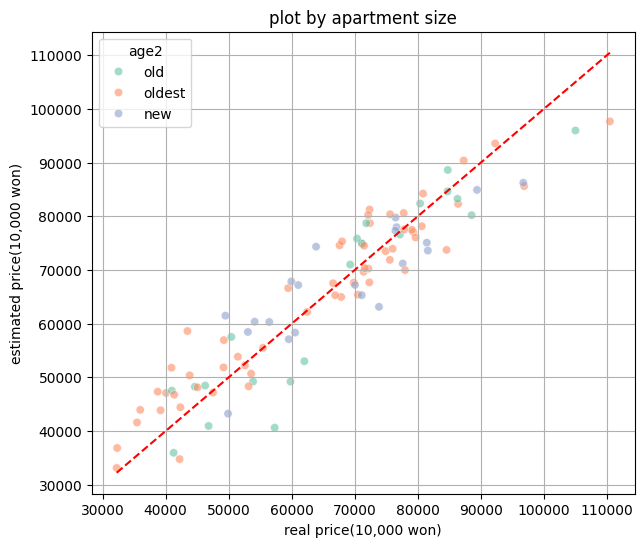

In [47]:
# (2) 평형대 만들기
def area_age(x):
    if x < 10:
        return "new"
    elif x < 20:
        return "old"
    else:
        return "oldest"

df_test["age2"] = df_test["건물연식"].apply(area_age) # 전용면적 리스트에 모두 적용되므로 브로드캐스팅 되었다고 한다.

# 평형대별 산점도
plt.figure(figsize=(7,6))
sns.scatterplot(
    x=y_test,
    y=y_pred,
    hue=df_test["age2"],
    palette="Set2",
    alpha=0.6
)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.title("plot by apartment size")
plt.xlabel("real price(10,000 won)")
plt.ylabel("estimated price(10,000 won)")
plt.grid(True)
plt.show()
#평수가 집값에 영향을 끼친다.